**DATA COLLECTION AND CLEANING (Repeated)**



In [1]:
import pandas as pd
import requests
import time

from bs4 import BeautifulSoup

In [2]:
response = requests.get(
    "https://www.spotrac.com/epl/rankings")
soup = BeautifulSoup(response.text, "html.parser")

In [3]:
links = []
teams_2021 = ['afc-bournemouth', 'arsenal-fc', 'aston-villa-fc', 'brentford-fc', 'brighton-hove-albion', 
         'chelsea-fc', 'crystal-palace', 'everton-fc', 'fulham-fc', 'leeds-united-fc', 'leicester-city',
         'liverpool-fc', 'manchester-city-fc', 'manchester-united-fc', 'newcastle-united-fc', 'nottingham-forest-fc',
         'southampton-fc', 'tottenham-hotspur-fc', 'west-ham-united-fc', 'wolverhampton-wanderers-fc']

for team in teams_2021:
  links.append("https://www.spotrac.com/epl/rankings/" + "2021" + "/" + team)
links

['https://www.spotrac.com/epl/rankings/2021/afc-bournemouth',
 'https://www.spotrac.com/epl/rankings/2021/arsenal-fc',
 'https://www.spotrac.com/epl/rankings/2021/aston-villa-fc',
 'https://www.spotrac.com/epl/rankings/2021/brentford-fc',
 'https://www.spotrac.com/epl/rankings/2021/brighton-hove-albion',
 'https://www.spotrac.com/epl/rankings/2021/chelsea-fc',
 'https://www.spotrac.com/epl/rankings/2021/crystal-palace',
 'https://www.spotrac.com/epl/rankings/2021/everton-fc',
 'https://www.spotrac.com/epl/rankings/2021/fulham-fc',
 'https://www.spotrac.com/epl/rankings/2021/leeds-united-fc',
 'https://www.spotrac.com/epl/rankings/2021/leicester-city',
 'https://www.spotrac.com/epl/rankings/2021/liverpool-fc',
 'https://www.spotrac.com/epl/rankings/2021/manchester-city-fc',
 'https://www.spotrac.com/epl/rankings/2021/manchester-united-fc',
 'https://www.spotrac.com/epl/rankings/2021/newcastle-united-fc',
 'https://www.spotrac.com/epl/rankings/2021/nottingham-forest-fc',
 'https://www.sp

In [4]:
# 2021-2022 Salaries

player_names_2021 = []
player_salaries_2021 = []

for player in links:
  link_response = requests.get(player)
  link_soup = BeautifulSoup(link_response.text, "html.parser")
  div = link_soup.find("div", 
                       attrs = {
                           "class": "rankings"
                       })
  table = div.find("table",
                   attrs = {
                       "class": "datatable noborder",
                   })
  table_body = table.find("tbody")

  for row in table_body.find_all("tr"):
    # finding the player names
    name_column = row.find_all("td",
                               attrs = {
                                   "class": "rank-name player noborderright"
                               })[0]
    name_h3 = name_column.find("h3")
    name = name_h3.find("a").string
    player_names_2021.append(name)

    # finding the player salary
    salary_column = row.find_all("td")[3]    
    salary = salary_column.string                     
    player_salaries_2021.append(salary)

In [5]:
df_2021_salary = pd.DataFrame({
    "name_2021": player_names_2021,
    "salary": player_salaries_2021
})
df_2021_salary

,name_2021,salary
0,Jefferson Lerma,"£2,600,000"
1,Dominic Solanke,"£2,600,000"
2,Lewis Cook,"£2,080,000"
3,Lewis Cook,"£1,820,000"
4,Adam Smith,"£1,820,000"
...,...,...
479,John Ruddy,"£301,600"
480,Rayan Aït-Nouri,"£234,000"
481,Toti Gomes,"£140,000"
482,Connor Ronan,"£40,000"


In [6]:
links2 = []
teams_2022 = ['afc-bournemouth', 'arsenal-fc', 'aston-villa-fc', 'brentford-fc', 'brighton-hove-albion', 
         'chelsea-fc', 'crystal-palace', 'everton-fc', 'fulham-fc', 'leeds-united-fc', 'leicester-city',
         'liverpool-fc', 'manchester-city-fc', 'manchester-united-fc', 'newcastle-united-fc', 'nottingham-forest-fc',
         'southampton-fc', 'tottenham-hotspur-fc', 'west-ham-united-fc', 'wolverhampton-wanderers-fc']

for team in teams_2022:
  links2.append("https://www.spotrac.com/epl/rankings/" + "2022" + "/" + team)
links2

['https://www.spotrac.com/epl/rankings/2022/afc-bournemouth',
 'https://www.spotrac.com/epl/rankings/2022/arsenal-fc',
 'https://www.spotrac.com/epl/rankings/2022/aston-villa-fc',
 'https://www.spotrac.com/epl/rankings/2022/brentford-fc',
 'https://www.spotrac.com/epl/rankings/2022/brighton-hove-albion',
 'https://www.spotrac.com/epl/rankings/2022/chelsea-fc',
 'https://www.spotrac.com/epl/rankings/2022/crystal-palace',
 'https://www.spotrac.com/epl/rankings/2022/everton-fc',
 'https://www.spotrac.com/epl/rankings/2022/fulham-fc',
 'https://www.spotrac.com/epl/rankings/2022/leeds-united-fc',
 'https://www.spotrac.com/epl/rankings/2022/leicester-city',
 'https://www.spotrac.com/epl/rankings/2022/liverpool-fc',
 'https://www.spotrac.com/epl/rankings/2022/manchester-city-fc',
 'https://www.spotrac.com/epl/rankings/2022/manchester-united-fc',
 'https://www.spotrac.com/epl/rankings/2022/newcastle-united-fc',
 'https://www.spotrac.com/epl/rankings/2022/nottingham-forest-fc',
 'https://www.sp

In [7]:
# 2022-2023 Salaries

player_names_2022 = []
player_salaries_2022 = []

for player in links2:
  link2_response = requests.get(player)
  link2_soup = BeautifulSoup(link2_response.text, "html.parser")
  div = link2_soup.find("div", 
                       attrs = {
                           "class": "rankings"
                       })
  table = div.find("table",
                   attrs = {
                       "class": "datatable noborder",
                   })
  table_body = table.find("tbody")

  for row in table_body.find_all("tr"):
    # finding the player names
    name_column = row.find_all("td",
                               attrs = {
                                   "class": "rank-name player noborderright"
                               })[0]
    name_h3 = name_column.find("h3")
    name = name_h3.find("a").string
    player_names_2022.append(name)

    # finding the player salary
    salary_column = row.find_all("td")[3]    
    salary = salary_column.string                     
    player_salaries_2022.append(salary)

In [8]:
df_2022_salary = pd.DataFrame({
    "name_2022": player_names_2022,
    "salary": player_salaries_2022
})
df_2022_salary

,name_2022,salary
0,David Brooks,"£2,860,000"
1,Jefferson Lerma,"£2,600,000"
2,Norberto Murara,"£2,600,000"
3,Marcos Senesi,"£2,600,000"
4,Dominic Solanke,"£2,600,000"
...,...,...
483,Conor Coady,"£858,000"
484,Max Kilman,"£780,000"
485,Rayan Aït-Nouri,"£234,000"
486,Toti Gomes,"£140,000"


In [9]:
# Importing 2021 Premier League Data 
data_2021 = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2021-22/gws/merged_gw.csv", encoding = "latin-1")

In [10]:
# Rename Columns To Join Datasets
data_2021 = data_2021.rename(columns={'name': 'name_2021'})

In [11]:
data_2021

,name_2021,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,...,5,0.0,0,0,0,0,50,True,0,1
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,...,3,0.0,0,0,0,0,45,False,0,1
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,...,3,0.0,0,0,0,0,45,True,0,1
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,...,3,0.0,2,0,0,0,65,False,0,1
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,...,5,59.0,20,0,0,0,120,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25442,Wilfred Ndidi,MID,Leicester,0.0,0,0,0,0,0.0,216,...,4,0.0,0,-202,22,224,48,True,0,38
25443,Matt Ritchie,DEF,Newcastle,0.9,0,0,3,0,0.0,292,...,1,0.0,1,143,396,253,49,False,0,38
25444,Nathan Redmond,MID,Southampton,3.4,0,0,5,0,0.0,336,...,4,0.0,2,455,683,228,59,False,0,38
25445,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,...,3,0.0,0,-2,0,2,45,True,0,38


In [12]:
data_2021.columns.values 

array(['name_2021', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round',
       'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW'],
      dtype=object)

In [13]:
df_joined = data_2021.merge(df_2021_salary, on=["name_2021"],
how="left")

df_joined

,name_2021,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,salary
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,...,0.0,0,0,0,0,50,True,0,1,"£4,160,000"
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,...,0.0,0,0,0,0,45,False,0,1,NaN
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,...,0.0,0,0,0,0,45,True,0,1,NaN
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,...,0.0,2,0,0,0,65,False,0,1,"£2,340,000"
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,...,59.0,20,0,0,0,120,True,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25480,Wilfred Ndidi,MID,Leicester,0.0,0,0,0,0,0.0,216,...,0.0,0,-202,22,224,48,True,0,38,NaN
25481,Matt Ritchie,DEF,Newcastle,0.9,0,0,3,0,0.0,292,...,0.0,1,143,396,253,49,False,0,38,"£2,340,000"
25482,Nathan Redmond,MID,Southampton,3.4,0,0,5,0,0.0,336,...,0.0,2,455,683,228,59,False,0,38,"£3,120,000"
25483,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,...,0.0,0,-2,0,2,45,True,0,38,NaN


In [14]:
df_joined["salary"] = df_joined["salary"].str.replace("£", "")
df_joined["salary"] = df_joined["salary"].str.replace(",", "")
df_joined["salary"] = df_joined["salary"].fillna(0)
df_joined["salary"] = df_joined["salary"].astype("float")

df_joined["salary"]

0        4160000.0
1              0.0
2              0.0
3        2340000.0
4              0.0
           ...    
25480          0.0
25481    2340000.0
25482    3120000.0
25483          0.0
25484    2080000.0
Name: salary, Length: 25485, dtype: float64

In [15]:
# Filter out players with terminated and null contracts

df_joined_2021 = df_joined[df_joined["salary"] > 0]

In [16]:
df_joined_2021

,name_2021,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,salary
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,...,0.0,0,0,0,0,50,True,0,1,4160000.0
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,...,0.0,2,0,0,0,65,False,0,1,2340000.0
6,James McArthur,MID,Crystal Palace,0.5,0,0,22,0,26.0,148,...,4.0,2,0,0,0,45,False,0,1,2860000.0
8,Paul Dummett,DEF,Newcastle,0.0,0,0,0,0,0.0,301,...,0.0,0,0,0,0,45,True,0,1,1820000.0
10,Alexis Mac Allister,MID,Brighton,2.4,0,3,28,0,0.4,74,...,17.0,9,0,0,0,55,False,0,1,1600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,John Ruddy,GK,Wolves,-0.5,0,0,11,0,0.0,452,...,0.0,1,-23,97,120,43,False,0,38,301600.0
25477,Mohammed Salisu,DEF,Southampton,0.4,0,0,13,0,0.0,351,...,0.0,0,-131,398,529,45,False,0,38,1200000.0
25481,Matt Ritchie,DEF,Newcastle,0.9,0,0,3,0,0.0,292,...,0.0,1,143,396,253,49,False,0,38,2340000.0
25482,Nathan Redmond,MID,Southampton,3.4,0,0,5,0,0.0,336,...,0.0,2,455,683,228,59,False,0,38,3120000.0


In [17]:
# Plot Teams
df_joined.loc[df_joined['team'] == "Watford"]["name_2021"]

2                Ayotomiwa Dele-Bashiru
7                           Kwadwo Baah
15                          Joshua King
19                           Danny Rose
30                         Stipe Perica
                      ...              
25400                       Edo Kayembe
25421    Juan Camilo HernÃ¡ndez SuÃ¡rez
25434                       Adam Masina
25465                      Kamil Conteh
25476                      Jack Grieves
Name: name_2021, Length: 1678, dtype: object

In [18]:
data_2022 = pd.read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/gws/merged_gw.csv", encoding='latin-1')
data_2022 = data_2022.rename(columns={'name': 'name_2022'})
data_2022

,name_2022,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Nathan Redmond,MID,Southampton,1.5,0,0,3,0,0.0,403,...,4,0.0,1,0,0,0,55,False,0,1.0
1,Junior Stanislas,MID,Bournemouth,1.1,0,0,3,0,0.0,58,...,2,0.0,1,0,0,0,50,True,0,1.0
2,Armando Broja,FWD,Chelsea,2.0,0,0,3,0,0.3,150,...,0,19.0,1,0,0,0,55,False,0,1.0
3,Fabian SchÃ¤r,DEF,Newcastle,2.4,0,3,43,1,14.6,366,...,2,25.0,15,0,0,0,45,True,0,1.0
4,Jonny Evans,DEF,Leicester,1.9,0,0,15,0,1.3,249,...,2,0.0,1,0,0,0,45,True,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,Ryan Sessegnon,DEF,Spurs,0.0,0,0,0,0,0.0,436,...,3,0.0,0,-1668,14,1682,44,True,0,27.0
18255,Ashley Young,DEF,Aston Villa,0.2,0,0,5,0,4.4,538,...,1,0.0,1,-4262,385,4647,43,False,0,27.0
18256,Jeremy Sarmiento Morante,MID,Brighton,1.0,0,0,0,0,0.0,119,...,2,0.0,0,2,180,178,45,False,0,27.0
18257,Jeremy Sarmiento Morante,MID,Brighton,1.0,0,0,3,0,0.3,119,...,1,0.0,1,2,180,178,45,True,0,27.0


In [19]:
df_2022_salary

,name_2022,salary
0,David Brooks,"£2,860,000"
1,Jefferson Lerma,"£2,600,000"
2,Norberto Murara,"£2,600,000"
3,Marcos Senesi,"£2,600,000"
4,Dominic Solanke,"£2,600,000"
...,...,...
483,Conor Coady,"£858,000"
484,Max Kilman,"£780,000"
485,Rayan Aït-Nouri,"£234,000"
486,Toti Gomes,"£140,000"


In [20]:
df_joined_2022 = data_2022.merge(df_2022_salary, on=["name_2022"],
how="left")

df_joined_2022

,name_2022,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,salary
0,Nathan Redmond,MID,Southampton,1.5,0,0,3,0,0.0,403,...,0.0,1,0,0,0,55,False,0,1.0,NaN
1,Junior Stanislas,MID,Bournemouth,1.1,0,0,3,0,0.0,58,...,0.0,1,0,0,0,50,True,0,1.0,"£1,820,000"
2,Armando Broja,FWD,Chelsea,2.0,0,0,3,0,0.3,150,...,19.0,1,0,0,0,55,False,0,1.0,"£2,080,000"
3,Fabian SchÃ¤r,DEF,Newcastle,2.4,0,3,43,1,14.6,366,...,25.0,15,0,0,0,45,True,0,1.0,NaN
4,Jonny Evans,DEF,Leicester,1.9,0,0,15,0,1.3,249,...,0.0,1,0,0,0,45,True,0,1.0,£0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18254,Ryan Sessegnon,DEF,Spurs,0.0,0,0,0,0,0.0,436,...,0.0,0,-1668,14,1682,44,True,0,27.0,"£3,000,000"
18255,Ashley Young,DEF,Aston Villa,0.2,0,0,5,0,4.4,538,...,0.0,1,-4262,385,4647,43,False,0,27.0,NaN
18256,Jeremy Sarmiento Morante,MID,Brighton,1.0,0,0,0,0,0.0,119,...,0.0,0,2,180,178,45,False,0,27.0,NaN
18257,Jeremy Sarmiento Morante,MID,Brighton,1.0,0,0,3,0,0.3,119,...,0.0,1,2,180,178,45,True,0,27.0,NaN


In [21]:
# Converting salaries from strings to floats
df_joined_2022["salary"] = df_joined_2022["salary"].str.replace("£", "")
df_joined_2022["salary"] = df_joined_2022["salary"].str.replace(",", "")
df_joined_2022["salary"] = df_joined_2022["salary"].fillna(0)
df_joined_2022["salary"] = df_joined_2022["salary"].astype("float")

In [22]:
df_joined_2022["salary"]

0              0.0
1        1820000.0
2        2080000.0
3              0.0
4              0.0
           ...    
18254    3000000.0
18255          0.0
18256          0.0
18257          0.0
18258    2080000.0
Name: salary, Length: 18259, dtype: float64

In [23]:
data_2022.columns.values

array(['name_2022', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time',
       'minutes', 'opponent_team', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'starts', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'], dtype=object)

In [24]:
df_2022 = df_joined_2022[df_joined_2022["salary"] > 0]
df_2022

,name_2022,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,salary
1,Junior Stanislas,MID,Bournemouth,1.1,0,0,3,0,0.0,58,...,0.0,1,0,0,0,50,True,0,1.0,1820000.0
2,Armando Broja,FWD,Chelsea,2.0,0,0,3,0,0.3,150,...,19.0,1,0,0,0,55,False,0,1.0,2080000.0
5,Brennan Johnson,FWD,Nott'm Forest,1.3,0,0,3,0,0.9,394,...,6.0,2,0,0,0,60,False,0,1.0,1560000.0
9,Fin Stevens,DEF,Brentford,1.0,0,0,0,0,0.0,540,...,0.0,0,0,0,0,40,False,0,1.0,280000.0
10,Brandon Austin,GK,Spurs,1.5,0,0,0,0,0.0,451,...,0.0,0,0,0,0,40,True,0,1.0,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18248,James Justin,DEF,Leicester,0.0,0,0,0,0,0.0,268,...,0.0,0,-839,48,887,42,True,0,27.0,429000.0
18251,Hugo Lloris,GK,Spurs,0.0,0,0,0,0,0.0,425,...,0.0,0,-7647,97,7744,54,True,0,27.0,5200000.0
18252,Nick Pope,GK,Newcastle,0.8,0,0,15,0,0.0,376,...,0.0,3,-35410,32306,67716,54,True,0,27.0,3120000.0
18254,Ryan Sessegnon,DEF,Spurs,0.0,0,0,0,0,0.0,436,...,0.0,0,-1668,14,1682,44,True,0,27.0,3000000.0


**DATA EXPLORATION and VISUALIZATIONS**

<Axes: title={'center': 'Expected Points Per Week 2021'}, xlabel='Game Week', ylabel='Player Points'>

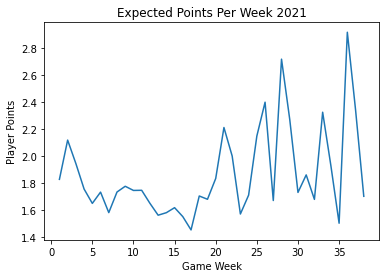

In [25]:
df_visual1 = df_joined_2021[df_joined_2021["GW"] < 39]
df_visual1.groupby("GW")["xP"].mean().plot.line(title = "Expected Points Per Week 2021", 
                                                xlabel = "Game Week", ylabel = "Player Points")

<Axes: title={'center': 'Expected Points Per Week 2022'}, xlabel='Game Week', ylabel='Player Points'>

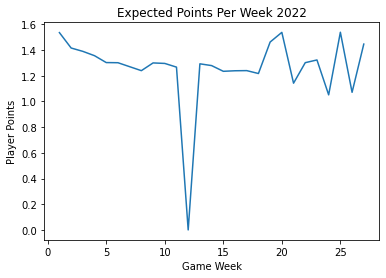

In [26]:
df_joined_2022.groupby("GW")["xP"].mean().plot.line(title = "Expected Points Per Week 2022", 
                                                    xlabel = "Game Week", ylabel = "Player Points")

<Axes: title={'center': 'Goals Scored Per Week 2021'}, xlabel='Game Week', ylabel='Goals Scored'>

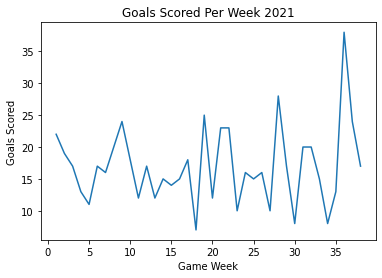

In [27]:
df_visual3 = df_joined_2021[df_joined_2021["GW"] < 39]
df_visual3.groupby("GW")["goals_scored"].sum().plot.line(title = "Goals Scored Per Week 2021", 
                                                         xlabel = "Game Week", ylabel = "Goals Scored")

<Axes: title={'center': 'Goals Scored Per Week 2022'}, xlabel='Game Week', ylabel='Goals Scored'>

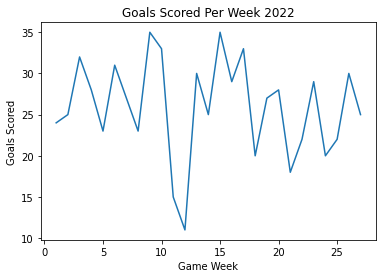

In [28]:
df_visual4 = df_joined_2022[df_joined_2022["GW"] < 39]
df_visual4.groupby("GW")["goals_scored"].sum().plot.line(title = "Goals Scored Per Week 2022", 
                                                         xlabel = "Game Week", ylabel = "Goals Scored")

In [29]:
import plotly.express as px

In [30]:
df_2022_cleaned = df_joined_2022[df_joined_2022["salary"] > 1000000]

In [31]:
px.scatter(df_2022_cleaned, x="salary", y="total_points", color="position")

In [32]:
df_2022_cleaned.columns

Index(['name_2022', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW', 'salary'],
      dtype='object')

In [33]:
px.line(df_joined_2022, x="GW", y="goals_scored", color="position")

<Axes: title={'center': 'Mean Number of Points Per Position 2021'}, xlabel='Position', ylabel='Player Points'>

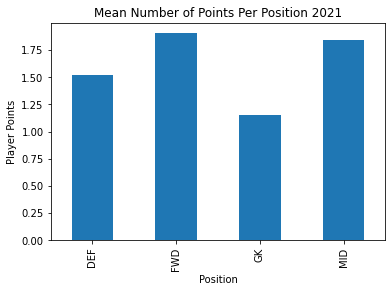

In [34]:
df_2021_visual = df_joined_2021[df_joined_2021["position"] != "GKP"]
df_2021_visual.groupby("position")["total_points"].mean().plot.bar(title = "Mean Number of Points Per Position 2021", 
                                                                   xlabel = "Position", ylabel = "Player Points")

<Axes: title={'center': 'Mean Number of Points Per Position 2022'}, xlabel='Position', ylabel='Player Points'>

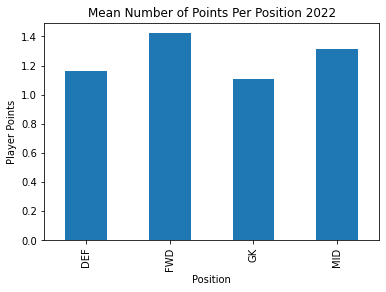

In [35]:
df_2022_visual = df_joined_2022[df_joined_2022["position"] != "GKP"]
df_2022_visual.groupby("position")["total_points"].mean().plot.bar(title = "Mean Number of Points Per Position 2022", 
                                                                   xlabel = "Position", ylabel = "Player Points")

In [36]:
df_joined_2021[df_joined_2021["position"] == "GKP"]

,name_2021,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,salary
23864,Bernd Leno,GKP,Arsenal,0.5,0,0,0,0,0.0,1,...,0.0,0,-422,216,638,45,False,0,37,5200000.0
23916,Kepa Arrizabalaga,GKP,Chelsea,0.5,0,0,0,0,0.0,129,...,0.0,0,-282,92,374,45,True,0,37,7800000.0
23932,Edouard Mendy,GKP,Chelsea,3.4,0,0,9,0,0.0,143,...,0.0,2,-18243,2873,21116,61,True,0,37,2704000.0
23936,Vicente Guaita,GKP,Crystal Palace,3.4,0,0,0,0,0.0,146,...,0.0,0,-28120,3155,31275,46,False,0,37,404000.0
23937,Vicente Guaita,GKP,Crystal Palace,3.4,0,0,0,0,0.0,146,...,0.0,0,-28120,3155,31275,46,False,0,37,404000.0
23957,Jack Butland,GKP,Crystal Palace,4.1,0,0,15,0,0.0,156,...,0.0,3,4373,5056,683,44,False,0,37,2288000.0
23958,Jack Butland,GKP,Crystal Palace,4.1,0,0,13,0,0.0,156,...,0.0,2,4373,5056,683,44,False,0,37,2288000.0
23987,Jordan Pickford,GKP,Everton,7.7,0,0,20,0,0.0,170,...,0.0,2,119025,123221,4196,48,True,0,37,5208333.0
23988,Jordan Pickford,GKP,Everton,7.7,0,0,13,0,0.0,170,...,0.0,2,119025,123221,4196,48,True,0,37,5208333.0
24030,Illan Meslier,GKP,Leeds,3.6,0,0,19,0,0.0,199,...,0.0,3,778,3747,2969,48,True,0,37,1144000.0


In [37]:
df_joined_2021.sort_values(by=["salary"], ascending = False)

,name_2021,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,salary
5529,Kevin De Bruyne,MID,Man City,6.2,0,0,3,0,3.8,251,...,24.0,1,-20279,34291,54570,120,True,0,10,20800000.0
19183,Kevin De Bruyne,MID,Man City,8.5,0,3,36,1,50.0,251,...,19.0,11,28109,52616,24507,117,False,0,31,20800000.0
145,Kevin De Bruyne,MID,Man City,2.2,0,0,4,0,11.6,251,...,7.0,1,0,0,0,120,False,0,1,20800000.0
1274,Kevin De Bruyne,MID,Man City,0.0,0,0,0,0,0.0,251,...,0.0,0,-63450,4023,67473,120,True,0,3,20800000.0
7409,Kevin De Bruyne,MID,Man City,0.0,0,0,0,0,0.0,251,...,0.0,0,-42029,337,42366,118,True,0,13,20800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,Cody Drameh,DEF,Leeds,-1.0,0,0,4,0,10.4,562,...,0.0,0,101,498,397,39,False,0,17,30000.0
5078,Cody Drameh,DEF,Leeds,0.0,0,0,0,0,0.0,562,...,0.0,0,-145,96,241,40,True,0,9,30000.0
6323,Cody Drameh,DEF,Leeds,0.0,0,0,0,0,0.0,562,...,0.0,0,-125,106,231,40,True,0,11,30000.0
18043,Cody Drameh,DEF,Leeds,0.0,0,0,0,0,0.0,562,...,0.0,0,-91,0,91,39,True,0,29,30000.0


In [38]:
df_2021_salary = df_joined_2021[df_joined_2021["salary"] > 20000000]

Text(0.5, 1.0, 'Expected Points vs Total Points in 2021 Season')

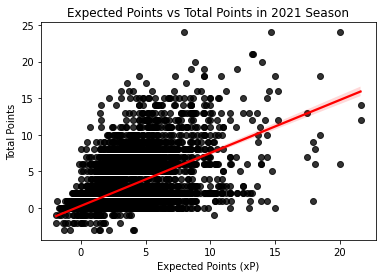

In [41]:
import seaborn as sns

# 2021 Plot Expected Points and Actual Points

plot = sns.regplot(x="xP", y="total_points", data=df_joined_2021, scatter_kws={"color": "black"}, line_kws={"color": "red"})

plot.set_xlabel("Expected Points (xP)")
plot.set_ylabel("Total Points")
plot.set_title("Expected Points vs Total Points in 2021 Season")

Text(0.5, 1.0, 'Expected Points vs Total Points in 2022 Season')

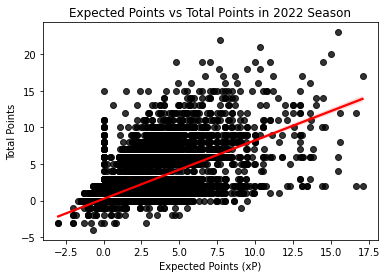

In [42]:
# 2022 Plot Expected Points and Actual Points

plot = sns.regplot(x="xP", y="total_points", data=df_joined_2022, scatter_kws={"color": "black"}, line_kws={"color": "red"})

plot.set_xlabel("Expected Points (xP)")
plot.set_ylabel("Total Points")
plot.set_title("Expected Points vs Total Points in 2022 Season")

In [43]:
# 2021 Points per Team
team = df_joined_2021.groupby("team")["total_points"].sum()
team_sorted = team.sort_values(ascending = False)
team_sorted

team
Chelsea           1499
West Ham          1263
Crystal Palace    1231
Leicester         1168
Spurs             1140
Man City          1110
Brighton          1098
Arsenal           1075
Everton           1072
Brentford         1060
Southampton       1012
Liverpool         1011
Newcastle          968
Leeds              930
Aston Villa        882
Man Utd            721
Wolves             384
Norwich             85
Burnley             46
Watford              0
Name: total_points, dtype: int64

<Axes: title={'center': 'Total Number of Points Per Team 2021'}, xlabel='Team', ylabel='Player Points'>

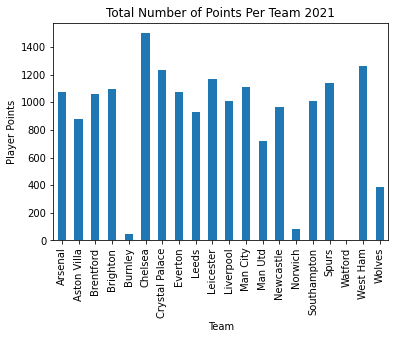

In [44]:
team.plot.bar(title = "Total Number of Points Per Team 2021", xlabel = "Team", ylabel = "Player Points")

In [45]:
# 2022 Points per Team
team_2022 = df_joined_2022.groupby("team")["total_points"].sum()
team_sorted_2022 = team_2022.sort_values(ascending = False)
team_sorted_2022

team
Arsenal           1554
Man City          1480
Newcastle         1328
Man Utd           1284
Liverpool         1278
Spurs             1277
Brentford         1275
Brighton          1213
Fulham            1148
Chelsea           1124
Aston Villa       1110
Leicester         1040
Crystal Palace    1022
Leeds              997
Wolves             994
Everton            987
Nott'm Forest      965
West Ham           962
Bournemouth        932
Southampton        906
Name: total_points, dtype: int64

<Axes: title={'center': 'Total Number of Points Per Team 2022'}, xlabel='Team', ylabel='Player Points'>

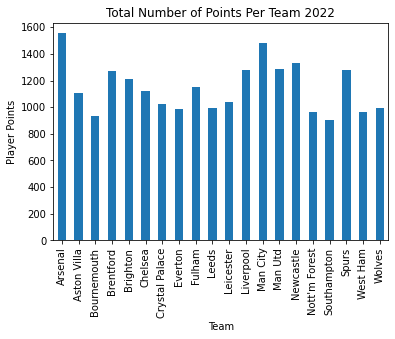

In [46]:
team_2022.plot.bar(title = "Total Number of Points Per Team 2022", xlabel = "Team", ylabel = "Player Points")

In [47]:
top_players_2021 = df_joined_2021.groupby("name_2021")["total_points"].mean()
top10_2021 = top_players_2021.sort_values(ascending = False).head(10)
top10_2021

name_2021
Mohamed Salah             6.973684
Heung-Min Son             6.789474
Trent Alexander-Arnold    5.473684
Kevin De Bruyne           5.157895
Harry Kane                5.052632
James Maddison            4.763158
Bukayo Saka               4.710526
Diogo Jota                4.605263
Mason Mount               4.447368
Raheem Sterling           4.289474
Name: total_points, dtype: float64

<Axes: title={'center': 'Top 10 Players in 2021'}, xlabel='Player Name', ylabel='Player Points'>

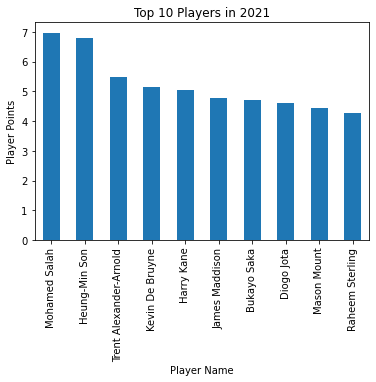

In [48]:
top10_2021.plot.bar(title = "Top 10 Players in 2021", xlabel = "Player Name", ylabel = "Player Points")

In [49]:
top_players_2022 = df_joined_2022.groupby("name_2022")["total_points"].mean()
top10_2022 = top_players_2022.sort_values(ascending = False).head(10)
top10_2022

name_2022
Erling Haaland              7.464286
Harry Kane                  6.357143
Kieran Trippier             6.153846
Marcus Rashford             5.962963
Martin Ãdegaard            5.857143
Mohamed Salah               5.777778
Ivan Toney                  5.740741
Gabriel Martinelli Silva    5.714286
Bukayo Saka                 5.642857
Miguel AlmirÃ³n Rejala      5.346154
Name: total_points, dtype: float64

<Axes: title={'center': 'Top 10 Players in 2022'}, xlabel='Player Name', ylabel='Player Points'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning:

Glyph 152 (\x98) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning:

Glyph 152 (\x98) missing from current font.



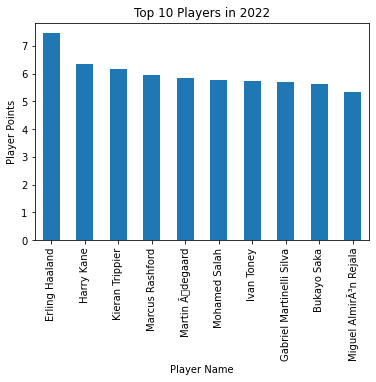

In [50]:
top10_2022.plot.bar(title = "Top 10 Players in 2022", xlabel = "Player Name", ylabel = "Player Points")

In [51]:
top_players_salary_2022 = df_joined_2021.groupby("name_2021")["salary"].mean()
top10salary_2022 = top_players_salary_2022.sort_values(ascending = False).head(10)
top10salary_2022

name_2021
Kevin De Bruyne    20800000.0
Jadon Sancho       18200000.0
Romelu Lukaku      16900000.0
Raheem Sterling    15600000.0
Jack Grealish      15600000.0
Paul Pogba         15080000.0
Timo Werner        14144000.0
Edinson Cavani     13000000.0
John Stones        13000000.0
Harry Kane         10400000.0
Name: salary, dtype: float64

<Axes: xlabel='name_2021'>

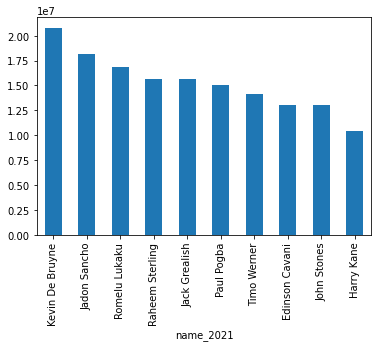

In [52]:
top10salary_2022.plot.bar()